# 1. Install Dependencies and Setup

In [3]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Tokir Sabugar\AppData\Local\Temp\pip-install-lif0ulr_\tensorflow-gpu_7382ba757ba14e91a720702d8837d777\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could 

In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
agate                        1.7.0
albumentations               1.3.1
alembic                      1.11.3
alibi-detect                 0.11.4
anyio                        3.6.1
app-store-scraper            0.3.5
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asgiref                      3.7.2
asn1crypto                   1.5.1
asttokens                    2.0.8
astunparse                   1.6.3
async-generator              1.10
attrs                        22.1.0
Automat                      22.10.0
Babel                        2.10.3
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
blinker                      1.6.2
cachetools                   5.3.0
camelcase                    0.2
catalogue                    2.0.9
certifi                      2022.6.15
cffi                         1.15.1
c

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

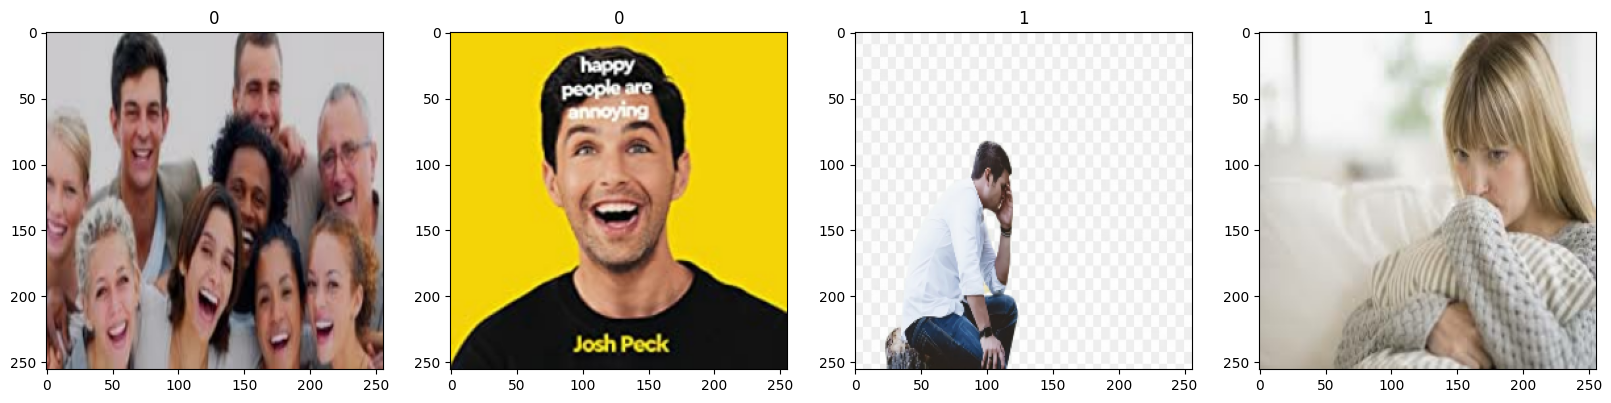

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.45490196, 0.40784314, 0.3137255 ],
          [0.45536152, 0.4083027 , 0.31418505],
          [0.45882353, 0.4117647 , 0.31764707],
          ...,
          [0.45490196, 0.43529412, 0.32156864],
          [0.45490196, 0.43529412, 0.32156864],
          [0.45490196, 0.43529412, 0.32156864]],
 
         [[0.45490196, 0.40784314, 0.3137255 ],
          [0.45536152, 0.4083027 , 0.31418505],
          [0.45882353, 0.4117647 , 0.31764707],
          ...,
          [0.45714614, 0.4375383 , 0.3238128 ],
          [0.45714614, 0.4375383 , 0.3238128 ],
          [0.45714614, 0.4375383 , 0.3238128 ]],
 
         [[0.45490196, 0.40784314, 0.3137255 ],
          [0.45536152, 0.4083027 , 0.31418505],
          [0.45882353, 0.4117647 , 0.31764707],
          ...,
          [0.45972955, 0.43830967, 0.3254902 ],
          [0.45994943, 0.43808976, 0.3254902 ],
          [0.45994943, 0.43808976, 0.3254902 ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

# 5. Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 11s 1s/step - loss: 1.2724 - accuracy: 0.4732 - val_loss: 0.6781 - val_accuracy: 0.6406
Epoch 2/20
7/7 [==============================] - 8s 1s/step - loss: 0.6706 - accuracy: 0.6205 - val_loss: 0.6343 - val_accuracy: 0.7500
Epoch 3/20
7/7 [==============================] - 8s 1s/step - loss: 0.5934 - accuracy: 0.6562 - val_loss: 0.6162 - val_accuracy: 0.6094
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 0.5375 - accuracy: 0.7500 - val_loss: 0.4254 - val_accuracy: 0.9062
Epoch 5/20
7/7 [==============================] - 8s 1s/step - loss: 0.4232 - accuracy: 0.8661 - val_loss: 0.4374 - val_accuracy: 0.7656
Epoch 6/20
7/7 [==============================] - 8s 1s/step - loss: 0.2963 - accuracy: 0.8795 - val_loss: 0.3208 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 8s 1s/step - loss: 0.2498 - accuracy: 0.9375 - val_loss: 0.1848 - val_accuracy: 0.9219
Epoch 8/20
7/7 [========================

# 8. Plot Performance

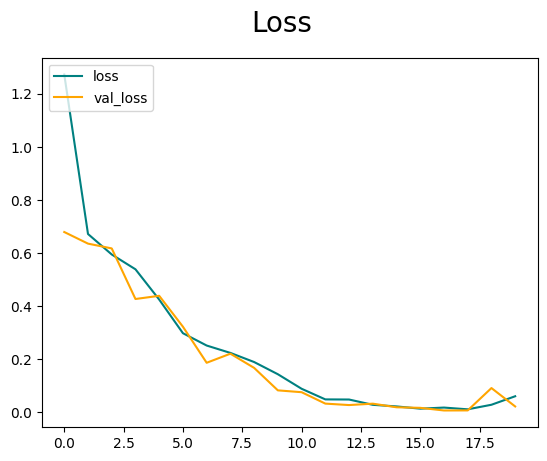

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

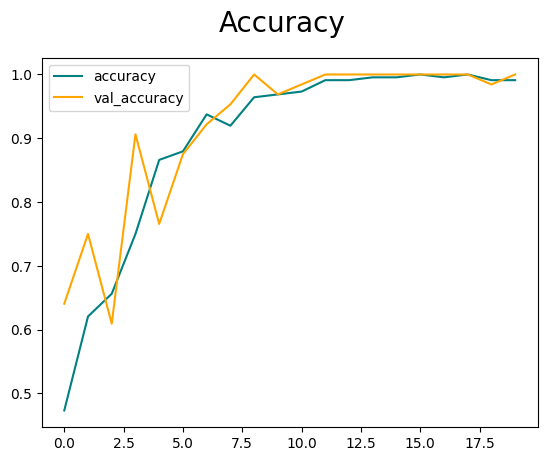

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 186ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [33]:
import cv2

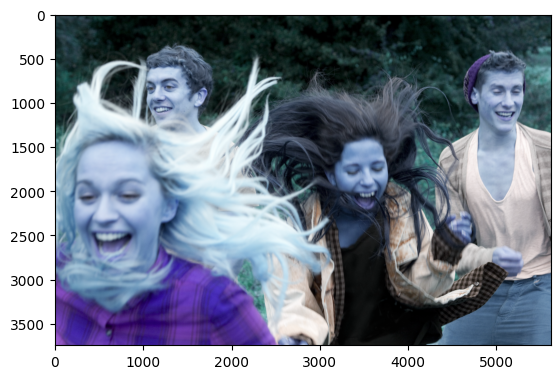

In [34]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

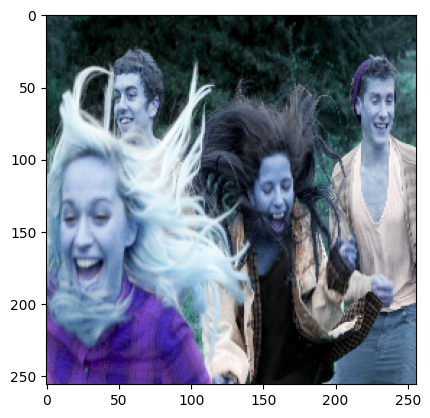

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 23ms/step


In [37]:
yhat

array([[0.00046621]], dtype=float32)

In [38]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [39]:
from tensorflow.keras.models import load_model

In [40]:
model.save(os.path.join('models','imageclassifier.h5'))

In [43]:
new_model = load_model(r'C:\Users\Tokir Sabugar\Downloads\ImageClassification-main\ImageClassification-main\models\imageclassifier.h5')

In [44]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 54ms/step


array([[0.00046621]], dtype=float32)